In [2]:
import numpy as np
import pandas as pd

In [4]:
# Pre-processing the data
df = pd.read_csv('/content/Final_time_series_data.csv')
print(df.info())
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108336 entries, 0 to 108335
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Year                    108336 non-null  int64  
 1   Month                   108336 non-null  int64  
 2   new_deaths_per_million  108335 non-null  float64
 3   Country                 108336 non-null  object 
 4   Date                    108336 non-null  object 
 5   GDP_per_Capita          107217 non-null  float64
 6   Democracy score         108336 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 5.8+ MB
None


In [5]:
import numpy as np

# Replace Inf and -Inf values with NaN
data = df.replace([np.inf, -np.inf], np.nan)

data['Country'] = data['Country'].astype('category')
data['Country_Codes'] = data['Country'].cat.codes

# Drop rows with NaN values
data_cleaned = data.dropna()
data_cleaned = data_cleaned.drop(columns=['Country'])


# Check that there are no remaining NaN or Inf values

numeric_cols = ['new_deaths_per_million', 'Democracy score', 'GDP_per_Capita', 'Country_Codes']  # List of columns expected to be numeric
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')


# Now check for Inf in the numeric columns only
print(np.isinf(data_cleaned[numeric_cols]).sum())
print(data_cleaned.head())
data_cleaned.describe()


new_deaths_per_million    0
Democracy score           0
GDP_per_Capita            0
Country_Codes             0
dtype: int64
            Year  Month  new_deaths_per_million  GDP_per_Capita  \
Date                                                              
2020-01-22  2020      1                     0.0      512.055098   
2020-01-23  2020      1                     0.0      512.055098   
2020-01-24  2020      1                     0.0      512.055098   
2020-01-25  2020      1                     0.0      512.055098   
2020-01-26  2020      1                     0.0      512.055098   

            Democracy score  Country_Codes  
Date                                        
2020-01-22             2.85              0  
2020-01-23             2.85              0  
2020-01-24             2.85              0  
2020-01-25             2.85              0  
2020-01-26             2.85              0  


,Year,Month,new_deaths_per_million,GDP_per_Capita,Democracy score,Country_Codes
count,107216.000000,107216.000000,107216.000000,107216.000000,107216.000000,107216.000000
mean,2020.556950,6.513338,1.495689,16282.073009,5.542656,73.850256
std,0.553783,3.452692,9.057929,22767.321269,2.178896,42.804152
min,2020.000000,1.000000,0.000000,216.827417,0.320000,0.000000
25%,2020.000000,4.000000,0.000000,1993.424478,3.540000,37.000000
50%,2021.000000,7.000000,0.000000,6036.447274,5.860000,74.000000
75%,2021.000000,10.000000,0.000000,20381.855783,7.180000,111.000000
max,2022.000000,12.000000,497.310000,133711.794436,9.810000,147.000000


In [6]:
# Set the date column as the index for time series analysis
# Inspect the final dataframe
print(df.head())

            Year  Month  new_deaths_per_million      Country  GDP_per_Capita  \
Date                                                                           
2020-01-22  2020      1                     0.0  Afghanistan      512.055098   
2020-01-23  2020      1                     0.0  Afghanistan      512.055098   
2020-01-24  2020      1                     0.0  Afghanistan      512.055098   
2020-01-25  2020      1                     0.0  Afghanistan      512.055098   
2020-01-26  2020      1                     0.0  Afghanistan      512.055098   

            Democracy score  
Date                         
2020-01-22             2.85  
2020-01-23             2.85  
2020-01-24             2.85  
2020-01-25             2.85  
2020-01-26             2.85  


In [ ]:
# Vector AutoRegression (VAR) Model

In [ ]:
## Check for stationary. VAR model requires all the time series model to be stationary, meaning they have
## constant mean and variance.

In [ ]:
# Augmented Dickey-Fuller (ADF) Test
# Null Hypothesis (H0): The time series has a unit root, meaning it is non-stationary, and not suitable for
# VAR
# Alternative Hypothesis (H1): The time series does not have a unit root, meaning it is stationary. We can
# proceed with using this data for VAR model

In [7]:
# check for stationarity

import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"

# check variables
# adf_test(data_cleaned['new_deaths_per_million'])
# adf_test(data_cleaned['GDP_per_Capita'])
# adf_test(data_cleaned['Democracy score'])

In [ ]:
# The p value for the COVID 19 deaths is 0, which is less than the significance level of 0.05. Therefore, we
# reject the null hypothesis and can conclude that this variable is stationary.
# The p value for GDP per capita is also less than 0, so it is stationary. The p value for democracy score is
# also small, so all three variables are stationary. We can proceed with using this data for the VAR model.

In [ ]:
!pip install statsmodels

In [9]:
from statsmodels.tsa.api import VAR

# Fit the VAR model with the cleaned data
model = VAR(data_cleaned)
results = model.fit(maxlags=15, ic='aic')

# Print model summary
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 24, Oct, 2024
Time:                     17:07:33
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -3.97129
Nobs:                     107201.    HQIC:                  -4.00533
Log likelihood:          -696645.    FPE:                  0.0179513
AIC:                     -4.02009    Det(Omega_mle):       0.0178601
--------------------------------------------------------------------
Results for equation Year
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             28.262151         1.094464           25.823           0.000
L1.Year                            0.988335         0.017183           57.518           0.000
L1.Month 

In [ ]:
# Correlation matrix of residuals shows the correlations between the residuals
# (errors) of the different variables.
# new_deaths_per_million and GDP_per_Capita: 0.014973
# Very close to zero which suggests that the errors of these two variables are
# almost uncorrelated, meaning there is no strong linear relationship between the
# prediction errors of these variables.

# new_deaths_per_million and Democracy score: 0.028176
# Also close to zero which suggests a weak or non-existent correlation between
# the errors of these two variables.

# GDP_per_Capita and Democracy score: 0.481574
# Moderate positive correlation which indicates that when the model makes errors
# in predicting GDP_per_Capita, those errors are moderately correlated with errors
# in predicting Democracy score.

# We want the residuals of different variables to be uncorrelated (close to 0)
# which indicates that the model is doing a good job of capturing the relationships
# between the variables, and the remaining prediction errors are random.

# The moderate residual correlation between GDP_per_capita and Democracy score suggest
# that the model might not be fully capturing the relationship between these variables.
# Therefore, we should take this into account when interpreting results for the Granger
# Casuality Test, as the results could be altered by shared influences rather than a
# direct casual relationship.

In [13]:
# check multicollinearity between GDP_per_capita and Democracy score
import pandas as pd
import statsmodels.api as sm
# Function to calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [sm.OLS(data[col], data.drop(col, axis=1)).fit().rsquared for col in data.columns]
    vif_data["VIF"] = 1 / (1 - vif_data["VIF"])
    return vif_data

vif_results = calculate_vif(data_cleaned)
print(vif_results)


                  feature        VIF
0                    Year  14.416489
1                   Month   4.559202
2  new_deaths_per_million   1.033539
3          GDP_per_Capita   2.283081
4         Democracy score  11.315176
5           Country_Codes  -0.000047


In [ ]:
# From the results, we can see that the VIF of GDP_per_Capita is low while the VIF of Democracy score is high.
# Now we want to assess if this is related to GDP_per_Capita by looking at the correlation matrix.

In [12]:
# See what variable Democracy score might have strong correlation with
correlation_matrix = data_cleaned.corr()
print(correlation_matrix)

                            Year     Month  new_deaths_per_million  \
Year                    1.000000 -0.169471                0.050895   
Month                  -0.169471  1.000000                0.014322   
new_deaths_per_million  0.050895  0.014322                1.000000   
GDP_per_Capita          0.052674 -0.006585                0.022808   
Democracy score        -0.015059  0.001048                0.072799   
Country_Codes           0.003036 -0.000309                0.000893   

                        GDP_per_Capita  Democracy score  Country_Codes  
Year                          0.052674        -0.015059       0.003036  
Month                        -0.006585         0.001048      -0.000309  
new_deaths_per_million        0.022808         0.072799       0.000893  
GDP_per_Capita                1.000000         0.579421       0.084150  
Democracy score               0.579421         1.000000       0.070978  
Country_Codes                 0.084150         0.070978       1.000000 

In [ ]:
# We see that the correlation between Democracy score and GDP_per_Capita is 0.579421, so multicollinearity
# is not a concern. Note that the correlation matrix only counts linear relationships. From our EDA we saw that
# a linear relationship between variables do not exist, so these values should not be used as interpretations
# for our analysis.

In [14]:
# Granger Casuality Test
# GDP per capita on COVID-19 deaths:
# H0: GDP per capita does not Granger-cause COVID-19 deaths, meaning that changes in GDP per capita do not help
# predict future changes in COVID-19 deaths and that there is no causal predictive relationship between the two
# variables.
# Ha: GDP per capita Granger-causes COVID-19 deaths, meaning that changes in GDP per capita can help predict future
# COVID-19 deaths.
# Democracy score on COVID-19 deaths:
# H0: Democracy score does not Granger-cause COVID-19 deaths, meaning that changes in democracy score do not help
# predict future changes in COVID-19 deaths  and that there is no causal predictive relationship between the two
# variables.
# Ha: Democracy score Granger-causes COVID-19 deaths, indicating that changes in democracy score can help predict
# future COVID-19 deaths.
from statsmodels.tsa.stattools import grangercausalitytests

# Specify the maxlag (based on your VAR model)
max_lag = 15

# Test Granger Causality for GDP per Capita on new_deaths_per_million
print("Granger Causality Test: GDP per Capita -> new_deaths_per_million")
grangercausalitytests(data_cleaned[['new_deaths_per_million', 'GDP_per_Capita']], max_lag)

# Test Granger Causality for Democracy score on new_deaths_per_million
print("\nGranger Causality Test: Democracy score -> new_deaths_per_million")
grangercausalitytests(data_cleaned[['new_deaths_per_million', 'Democracy score']], max_lag)

Granger Causality Test: GDP per Capita -> new_deaths_per_million

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=58.9570 , p=0.0000  , df_denom=107212, df_num=1
ssr based chi2 test:   chi2=58.9587 , p=0.0000  , df=1
likelihood ratio test: chi2=58.9425 , p=0.0000  , df=1
parameter F test:         F=58.9570 , p=0.0000  , df_denom=107212, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=31.2097 , p=0.0000  , df_denom=107209, df_num=2
ssr based chi2 test:   chi2=62.4223 , p=0.0000  , df=2
likelihood ratio test: chi2=62.4041 , p=0.0000  , df=2
parameter F test:         F=31.2097 , p=0.0000  , df_denom=107209, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.9481 , p=0.0000  , df_denom=107206, df_num=3
ssr based chi2 test:   chi2=71.8489 , p=0.0000  , df=3
likelihood ratio test: chi2=71.8249 , p=0.0000  , df=3
parameter F test:         F=23.9481 , p=0.0000  , df_denom=107206, df_num=3

Granger Ca

{1: ({'ssr_ftest': (606.6308396088929, 1.4257742912945901e-133, 107212.0, 1),
   'ssr_chi2test': (606.6478143180562, 5.995973000586673e-134, 1),
   'lrtest': (604.9379826710792, 1.4117434389264817e-133, 1),
   'params_ftest': (606.6308396083098,
    1.4257742917049255e-133,
    107212.0,
    1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (322.78845890900294, 1.7184667937477025e-140, 107209.0, 2),
   'ssr_chi2test': (645.607026153958, 6.430067495626328e-141, 2),
   'lrtest': (643.6709790957393, 1.6928668815044586e-140, 2),
   'params_ftest': (322.78845890882127,
    1.7184667940560893e-140,
    107209.0,
    2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (229.92385294139916, 1.04312861881758e-148, 107206.0, 3),
   'ssr_chi2test': (689.8165973566654, 3.389723068418739e-149, 3),
   'lrtest': (687.6069042888703, 1.0216409236527534e-148, 3),
   'params_ftest': (229.9238529428841,
    1.0431286165091664e-148,
    107206.0,
    3.0)},
   a

In [ ]:
# GDP per capita - New Deaths per million
# At 1-6 lags, the p-value is 0.0000, meaning that GDP per capita granger causes
# new deaths per million with strong statistical significance.
# F-test and chi-squared values confirm that GDP per capita can help predict changes
# in new deaths per million during these time periods.
# From 7+, the p-value becomes very high, indicating GDP per capita no longer
# granger causes new deaths per million.

# Democracy score - New deaths per million
# At all lags 1-6, the p-values are 0.000, meaning democracy score strongly granger
# causes new deaths per million.
# High F-test and chi-squared values indicate strong predictive power of democracy
# score on new deaths per million.

# Overall, both GDP per capita and Democracy Score demonstrate significant Granger-causal
# relationships with new deaths per million, particularly at shorter lags. However, we should
# keep in mind that these interpretations might not be 100 % accurate as we found a strong
# positive residual correlation between GDP per capita and Democracy Score, so there might
# be overlapping influences in predicting new deaths per million.



In [16]:

!pip install statsmodels pandas matplotlib

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox


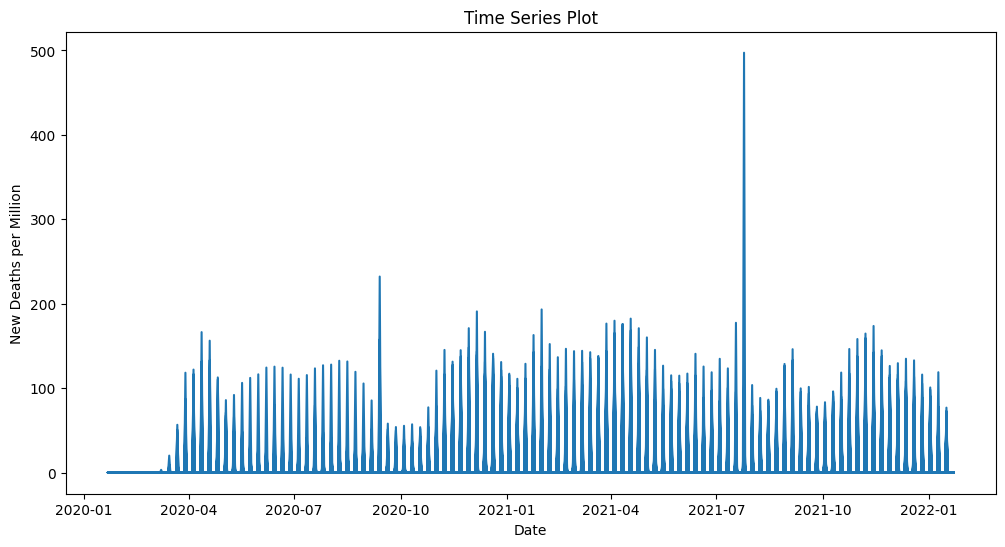

In [19]:
# Visalize time series plot to see seasonality

# Load your data
y = data_cleaned['new_deaths_per_million']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('New Deaths per Million')
plt.show()


In [ ]:
# The time series plot does not show consistent seasonal patterns. Therefore, we will choose the ARIMAX model instead
# of the SARIMAX model.

In [ ]:
# ARIMAX model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [20]:
# Ensure data is sorted by date
data_cleaned = data_cleaned.sort_index()

# Define the response variable
y = data_cleaned['new_deaths_per_million']

# Define exogenous variables
X = data_cleaned[['GDP_per_Capita', 'Democracy score']]


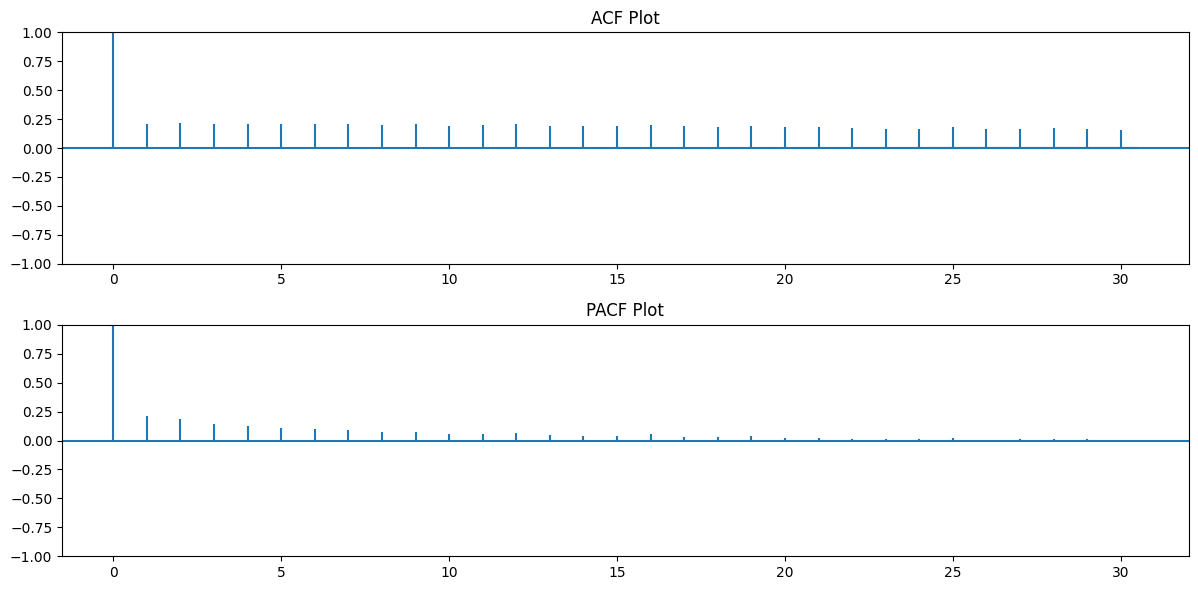

In [23]:

# Identify AR and MA Orders
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(211)
plot_acf(y.dropna(), lags=30, ax=plt.gca(), markersize=0)
plt.title('ACF Plot')

# PACF Plot
plt.subplot(212)
plot_pacf(y.dropna(), lags=30, ax=plt.gca(), markersize=0)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()



In [ ]:
# p = 2 or 3 (from PACF pattern showing significant first few lags)
# d = 0 (as data stationary)
# q = 0 or 1 (from ACF decay pattern)
# potential models
# ARIMAX(2,0,0)
# ARIMAX(3,0,0)
# ARIMAX(2,0,1)